# Linear Regression homework

The goal of this homework is to help you to understand the principles behind numerical curve fitting to the data in an actual dataset. You will complete the code left as comments in this notebook.

First import libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will use sklearn only to import the dataset, but otherwise the whole process will be done without sklearn (or any other automated library, for the matter).

In [69]:
from sklearn import datasets ## imports datasets from scikit-learn

The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes.

In [70]:
boston = datasets.load_boston() ## with this we are done with sklearn

Let's take a look at the size of the feature array:

Next, we’ll load the data to Pandas 

In [71]:
# define the features/predictors as the pre-set feature names  
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(boston.target, columns=["MEDV"])

We define input X and output y:

In [72]:
X = df
y = target['MEDV']

Just check the first rows of input and output

In [73]:
print(X[0:5])
print(y[0:5])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


## Gradient descent

The linear prediction ${f_i}$ in a given row $X_i$ of the dataset is calculated as $X_i$ ° $\theta^T$, where $\theta = \theta_0, \theta_1, ... \theta_n$. Now, this assumes $X_i$ has been extended with a 1 as first element, so that the 1 will multiply $\theta_0$, which is the intercept of the linear prediction. We want the weights $\theta$ to be such that the difference from the prediction ${f_i}$ to the actual value $y_i$ is as little as possible. Even more, we want sum of the squares of that difference to be as small as possible, for all the rows in the dataset.

We call __loss__ the cummulated quadratic error in the dataset for a given $\theta$, so we want the loss to be as small as possible, and for that we will try different values for the $\theta$ vector, but not in a blind way, but using the __gradient descent__ optimization method.

### From dataset to matrices
First of all, we convert the dataset to regular numpy matrices so that we don't need pandas anymore:

In [74]:
Xnum = X.to_numpy()
ynum = y.to_numpy()
print(Xnum.shape)

(506, 13)


We put a column of ones at the left of X, as explained above:

In [75]:
ones = np.ones([X.shape[0],1])
Xnum = np.concatenate((ones,Xnum),axis=1)
Xnum[0:1]
print(Xnum[:,0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

Please first define the cost function: (as a verification, the value for $\theta =$ np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]) should be a number, around 412,764)

In [76]:
def quadCost(X,y,theta):
    #sum of each computation between the row and theta vector
    estimated = np.zeros([len(y)])
    
    #for to get the sum of each multiplication of row vs theta vector
    for i in range(len(y)):
        val = X[i] * theta 
        estimated[i] = val.sum()
    
    #get the difference and square the results
    dif_sqr = (y - estimated)**2
    
    #compute the cost by dividing the value by 2 *len of y
    cost = dif_sqr.sum()/(2*len(y))

    return cost

theta = np.ones(X.shape[1] + 1)
quadCost(Xnum,ynum,theta)

411874.07592440146

Now let's define the gradient descent function, which calls quadCost:

In [113]:
def graDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters) #initialize costs with zeros

    for i in range(iters):  
        # calculate the error
        estimated = np.zeros([len(y)])
        for j in range(len(y)):
            val = X[j] * theta 
            estimated[j] = val.sum() 
        
        error = estimated - y

        for j in range(len(theta)):
            val = error * X[:,j]
            theta[j] = theta[j] - (alpha/len(y)) * (val.sum())
        
        cost[i] = quadCost(Xnum,ynum,theta)
        
    return theta,cost
# theta is the final updated value of theta
# cost should be a vector of the history of costs, from the initial one

theta = np.ones(X.shape[1] + 1)
alpha = 0.000006
iters = 250

finalTheta,costVector = graDescent(Xnum,ynum,theta,iters,alpha)
print(finalTheta)
print("This is the error: {}".format(costVector[-1]))

[ 0.99537116  0.89134143  0.71417917  0.93775431  0.99994412  0.99706235
  0.9763453   0.38019994  0.97950806  0.97652251 -0.16170423  0.91458504
 -0.01862482  0.83264476]
This is the error: 201.65406266790148


Initialize the values of the parameters; theta should be initialized with random numbers

In [114]:
# You initialization here
theta = np.random.randint(low = -1000 , high = 1000, size = X.shape[1] + 1)
print(theta)

[-979  577  316  732 -606  466  681  663 -683 -748 -445 -775 -471 -924]


Call gradient descent from the X, y, theta, iters and alpha, and get the final theta and the cost vector:

In [115]:
alpha = 0.000006
iters = 250

finalTheta,costVector = graDescent(Xnum,ynum,theta,iters,alpha)

We print the value you obtained for theta:

In [116]:
print(finalTheta)

[-911  342  128  503 -592  246  477  266 -444 -521    0 -625   -1 -808]


Graph the cost vector. If it converges, then it will be a nice curve gradually going down:

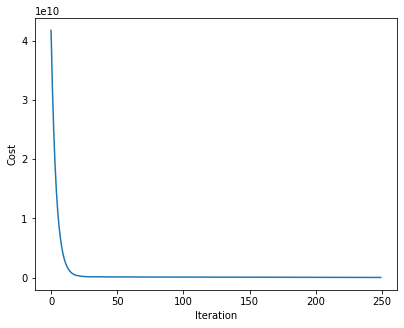

In [120]:
# your plot code here; the figure should appear below

values = np.arange(iters)

plt.figure(figsize = (6.5, 5))
plt.plot(values, costVector, )
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()